In [16]:
# Dependencies
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
# Reading the clean csv file
df = pd.read_csv(r'Clean_QV_Data.csv')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,Woolworths,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,CCs,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget


In [4]:
df.shape

(246740, 12)

In [5]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'BRAND_NAME', 'PACK_SIZE',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [6]:
# Calculating total sales by Lifestage of Customer
SalesbyLifestage = pd.pivot_table(df, index = 'LIFESTAGE', values = 'TOT_SALES', aggfunc = np.sum).sort_values(by='TOT_SALES', ascending = False)
SalesbyLifestage = SalesbyLifestage.reset_index()

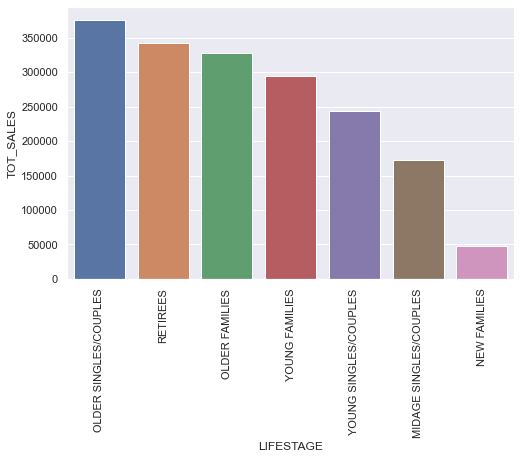

In [18]:
# Total Sales by Lifestage of Customer
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data = SalesbyLifestage, x = 'LIFESTAGE', y = 'TOT_SALES')
plt.xticks(rotation = 90)
plt.show()

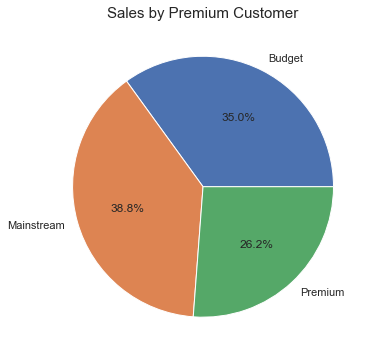

In [36]:
# Sales by Premium Customer
SalesbyPremCust = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
fig, ax = plt.subplots(figsize=(10,6))
plt.pie(x = SalesbyPremCust, autopct = '%0.1f%%', labels = SalesbyPremCust.index )
plt.title('Sales by Premium Customer', fontsize=15)
plt.show()